In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def get_mat(n):
    """
    Генерация входных матриц.
    Проверяем, является ли n степенью двойки,
    если нет - достраиваем матрицу до нужного
    размера нулевыми столбцами и строками.
    :param n: размер матрицы
    :return: res - целочисленная матрица
    """
    res = np.random.randint(0, 51, (n, n))
    if np.modf(np.log2(n))[0] != 0:
        add = int((2 ** (np.floor(np.log2(n)) + 1)) - n)
        zeros = np.zeros((n + add, n + add), dtype=int)
        zeros[:n, :n] = res
        res = zeros
    return res

In [3]:
def get_submat(X):
    """
    Выделение подматриц
    :param X: матрица
    :return: кортеж подматриц
    """
    n = np.shape(X)[0] // 2
    a11 = X[:n, :n]
    a12 = X[:n, n:]
    a21 = X[n:, :n]
    a22 = X[n:, n:]
    return a11, a12, a21, a22

In [4]:
def strassen(A, B):
    """
    Имлементация алгоритма Штрассена
    :param A: первый множитель
    :param B: второй множитель
    :return: С -  результат умножения
    """

    n = np.shape(A)[0]
    C = np.zeros_like(A)

    if n == 1:
        C[0][0] = A[0][0] * B[0][0]
        return C
    else:

        k = n // 2

        A11, A12, A21, A22 = get_submat(A)
        B11, B12, B21, B22 = get_submat(B)

        S1 = B12 - B22
        S2 = A11 + A12
        S3 = A21 + A22
        S4 = B21 - B11
        S5 = A11 + A22
        S6 = B11 + B22
        S7 = A12 - A22
        S8 = B21 + B22
        S9 = A11 - A21
        S10 = B11 + B12

        P1 = strassen(A11, S1)
        P2 = strassen(S2, B22)
        P3 = strassen(S3, B11)
        P4 = strassen(A22, S4)
        P5 = strassen(S5, S6)
        P6 = strassen(S7, S8)
        P7 = strassen(S9, S10)

        C[:k, :k] = P5 + P4 - P2 + P6
        C[:k, k:] = P1 + P2
        C[k:, :k] = P3 + P4
        C[k:, k:] = P5 + P1 - P3 - P7

        return C

In [5]:
A, B = get_mat(3), get_mat(3)
print('Input:')
print(A, "\n")
print(B, "\n")

print('Strassen:')
print(strassen(A, B))
print('Numpy default function:')
print(np.matmul(A, B))

Input:
[[ 2 42 11  0]
 [46 21  1  0]
 [ 3 45 29  0]
 [ 0  0  0  0]] 

[[37 38 22  0]
 [28 34 48  0]
 [12 33  7  0]
 [ 0  0  0  0]] 

Strassen:
[[1382 1867 2137    0]
 [2302 2495 2027    0]
 [1719 2601 2429    0]
 [   0    0    0    0]]
Numpy default function:
[[1382 1867 2137    0]
 [2302 2495 2027    0]
 [1719 2601 2429    0]
 [   0    0    0    0]]


In [6]:
def wrapper():
    time_history = []
    orders = [2**i for i in range(2, 7)]
    for i in orders:
        A, B = get_mat(i), get_mat(i)
        since = time.time()
        strassen(A, B)
        time_elapsed = (time.time() - since)
        time_history.append(time_elapsed)
    return orders, time_history

   Matrix size  Time (seconds)
0            4        0.001417
1            8        0.007187
2           16        0.045065
3           32        0.249424
4           64        1.766099


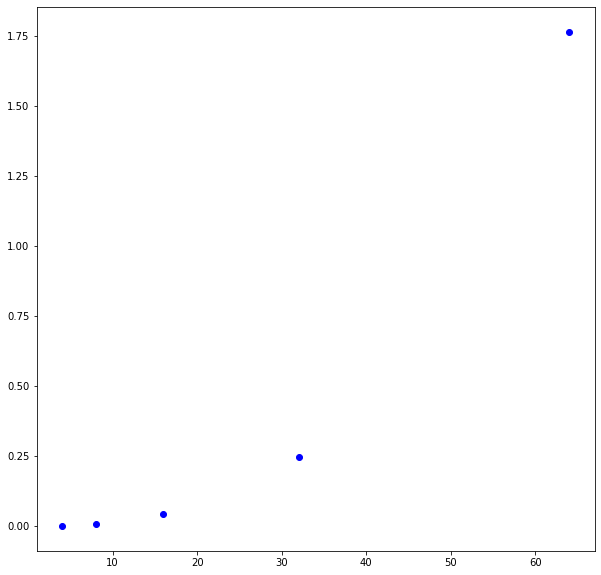

In [9]:
sizes, times = wrapper()
df = pd.DataFrame(list(zip(sizes, times)), columns=['Matrix size', 'Time (seconds)'] )
print(df)
#df.to_csv('test_2.csv', sep='\t', index=False)


plt.figure(figsize = (10, 10))
plt.plot(sizes, times, 'bo')
plt.show()

In [12]:
def wrapper():
    time_history = []
    orders = [i for i in range(2, 72)]
    for i in orders:
        A, B = get_mat(i), get_mat(i)
        since = time.time()
        strassen(A, B)
        time_elapsed = (time.time() - since)
        time_history.append(time_elapsed)
    return orders, time_history

    Matrix size  Time (seconds)
0             2        0.000280
1             3        0.001539
2             4        0.000974
3             5        0.008053
4             6        0.007688
..          ...             ...
65           67       12.111771
66           68       12.114576
67           69       12.118819
68           70       12.093073
69           71       12.090312

[70 rows x 2 columns]


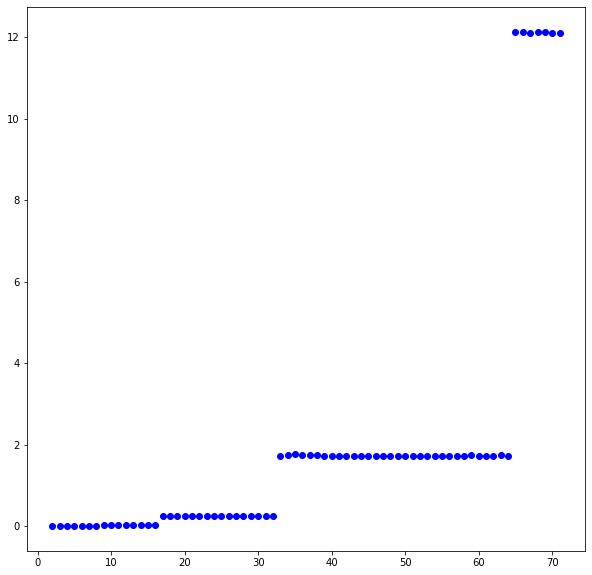

In [13]:
sizes, times = wrapper()
df = pd.DataFrame(list(zip(sizes, times)), columns=['Matrix size', 'Time (seconds)'] )
print(df)
#df.to_csv('test_2.csv', sep='\t', index=False)


plt.figure(figsize = (10, 10))
plt.plot(sizes, times, 'bo')
plt.show()